# Data Analysis of AirBnB Dataset


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data = pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory = 'False')

# Access the dataset to check the components in it

In [3]:
data.head() # Print 1st 5 elements

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-21,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-22,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-18,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
data.tail() # Print last 5 elements

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,06-07-15,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,11-10-15,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [5]:
data.dtypes # Display the data type of each column in the data DataFrame

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [6]:
data.info() # concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
data.duplicated().value_counts() # Count the total duplicate values

,count
False,102058
True,541


In [8]:
# Neighbourhood was 'brookln' instead of 'Brooklyn'
data[data['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-19,1.34,4.0,3.0,47.0,NaN,NaN


# The problems in the AirBnB dataset are:

1.   There are 541 duplicate entries.
2.   The attributes house_rules and license have insufficient data recorded.
3. The price and service fee columns have the symbols: '$' and ',' recorded.
4. The currency is not added to the column titles price and service fee.
5. Many NaN (Not a Number) values are found in the last review, reviews per month, house_rules, license columns.
6. The word 'Brooklyn' is spelt as 'brookln' in some entries.
7. There are outliers in availability 365 column.



# To resolve the problems, perform data cleaning.

The steps are:
1. Drop duplicated entries.
2. Drop the columns house_rules and license as they have insufficient data.
3. Remove the dollar and comma signs from the column entries.
4. Rename the column titles price and service fee (include $ sign).
5. Drop missing or NaN values.
6. Convert the datatypes of 'id', 'host id','Construction year', 'last review'.
7. Remove outliers in availability 365 column.

In [9]:
# Drop duplicate records
data.drop_duplicates(inplace = True)

# Drop house_rules and license columns with insufficient data
data.drop(['house_rules', 'license'], axis = 1, inplace= True)

# Before using .str, ensure the data is converted to a string
data['price'] = data['price'].astype(str).str.replace('$', '', regex= False)
data['service fee'] = data['service fee'].astype(str).str.replace('$', '', regex= False)

# Remove all dollar signs in the price and service fee columns
data['price'] = data['price'].str.replace('$', '', regex= False)
data['service fee'] = data['service fee'].str.replace('$', '', regex= False)

# Remove all commas in the price and service fee columns
data['price'] = data['price'].str.replace(',', '', regex= False)
data['service fee'] = data['service fee'].str.replace(',', '', regex= False)

# Rename the price and service fee columns to include a dollar sign
data.rename(columns = {
    'price': 'price_$',
    'service fee': 'service fee_$'
}, inplace = True)

# Drop all records with missing values
data.dropna(inplace = True)

# Change all mismatched data types to the appropriate ones.
data['price_$'] = data['price_$'].astype(float)
data['service fee_$'] = data['service fee_$'].astype(float)
data['id'] = data['id'].astype(str)
data['host id'] = data['host id'].astype(str)
data['last review'] = pd.to_datetime(data['last review'])
data['Construction year'] = data['Construction year'].astype(int)

# Correct the spelling of 'brookln' to 'Brooklyn'
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the availability 365' column data
data = data.drop(data[data['availability 365'] > 500].index)

In [10]:
data.duplicated().value_counts() # Check if duplicates are present or not

,count
False,83818


In [11]:
data.info() # Verifying if our changes are reflected

<class 'pandas.core.frame.DataFrame'>
Index: 83818 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83818 non-null  object        
 1   NAME                            83818 non-null  object        
 2   host id                         83818 non-null  object        
 3   host_identity_verified          83818 non-null  object        
 4   host name                       83818 non-null  object        
 5   neighbourhood group             83818 non-null  object        
 6   neighbourhood                   83818 non-null  object        
 7   lat                             83818 non-null  float64       
 8   long                            83818 non-null  float64       
 9   country                         83818 non-null  object        
 10  country code                    83818 non-null  object        
 11  instan

# Perform Exploratory Data Analysis (EDA) to understand the attributes & entries.

In [12]:
data.describe() # To generate summarized statistics for the numerical columns in the data

,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83818.000000,83818.000000,83818.000000,83618.000000,83589.000000,83818.000000,83818.000000,83818,83818.000000,83818.000000,83818.000000,83818.000000
mean,40.727357,-73.948500,2012.490217,626.345476,125.233033,7.436028,32.241893,2019-06-03 19:24:16.613137920,1.375827,3.278902,7.049691,141.755411
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-01-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-15 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-05-31 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-09-06 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-12-02 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,5.760865,331.793162,66.354589,28.119584,51.901397,NaN,1.749397,1.283646,29.564849,133.399179


Understanding the different property types in the dataset

In [13]:
# What are the different property types in the dataset?
property_types = data['room type'].value_counts().to_frame()
print(property_types)

                 count
room type             
Entire home/apt  44369
Private room     37684
Shared room       1655
Hotel room         110


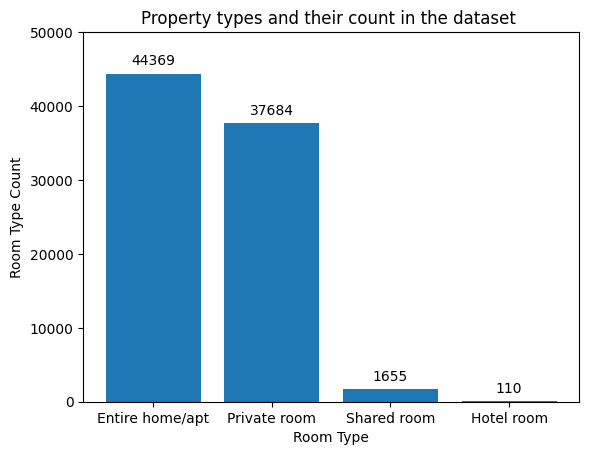

In [14]:
# Room type count plotted on bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim(0, 50000);
plt.title('Property types and their count in the dataset ');
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
#

The AirBnB dataset has 4 distinct property/room types:
1. Entire home/apartment
2. Private room
3. Shared room
4. Hotel room

The count of each is represented in the above bar plot.

 # Neighbourhood with highest number of listings

In [15]:
hood_group = data['neighbourhood group'].value_counts().to_frame()
print(hood_group)

                     count
neighbourhood group       
Brooklyn             34794
Manhattan            34741
Queens               11186
Bronx                 2276
Staten Island          821


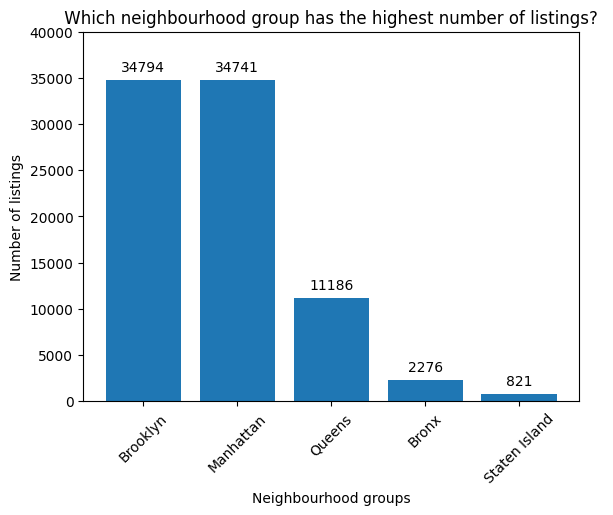

In [16]:
# Which neighbourhood has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim(0, 40000);
plt.title(' Which neighbourhood group has the highest number of listings? ');
plt.xlabel('Neighbourhood groups');
plt.ylabel('Number of listings');
plt.xticks(rotation = 45);
#

**Brooklyn** has the highest number of listings, followed by Manhatttan.

In total the neighbourhood groups in the dataset are:
1. Brooklyn
2. Manhattan
3. Queens
4. Bronx
5. Staten Island

## Neighbourhood groups with the highest average prices

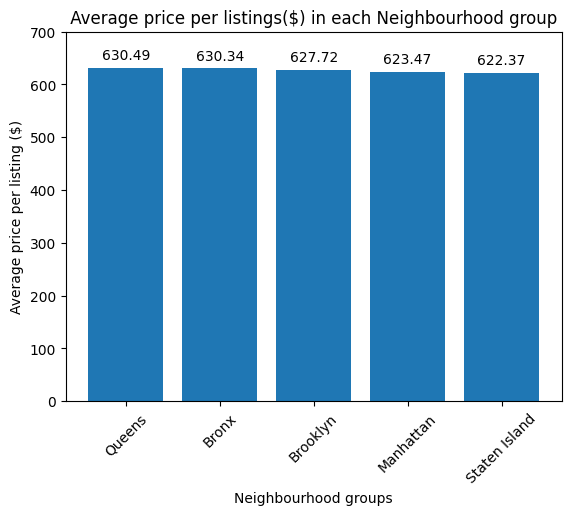

In [17]:
# Neighbourhood group have the highest average prices for AirBnB listings?
avg_price = data.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending= False ).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2),label_type= 'edge', padding = 4);
plt.ylim(0, 700);
plt.title(' Average price per listings($) in each Neighbourhood group ');
plt.xlabel('Neighbourhood groups');
plt.ylabel('Average price per listing ($)');
plt.xticks(rotation = 45);
#

The average listing prices in each neighbourhood group from highest to lowest are:
1. Queens - $ 630.49

2. Bronx - $ 630.34

3. Brooklyn - $ 627.72

4. Manhattan - $ 623.47

5. Staten Island - $ 622.37

## Relationship between the construction year of property and price

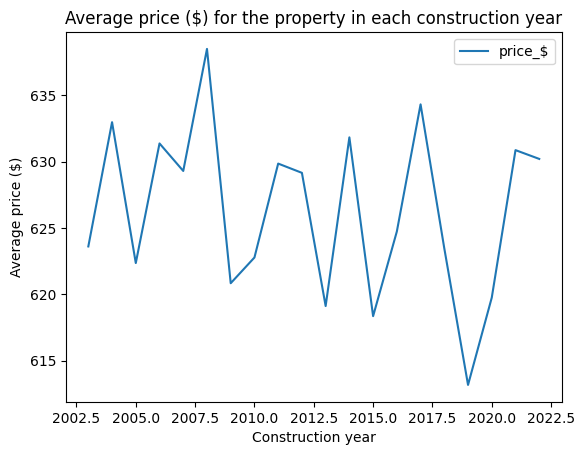

In [18]:
# Is there a relationship between the construction year of property and price?
data.groupby(data['Construction year'])['price_$'].mean().to_frame().plot();
plt.title('Average price ($) for the property in each construction year');
plt.xlabel('Construction year');
plt.ylabel('Average price ($)');
#

Yes, there is a relationship between the construction year of property and price. Generally, as the years progress the listing price is reduced.

# The top 10 hosts by listing count

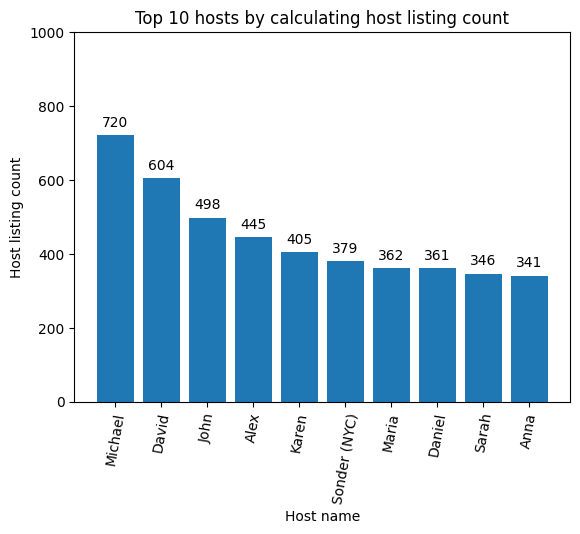

In [19]:
# Who are the top 10 hosts by calculating host listing count?
#hosts = data.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
# Wrong due to highly inflated and incorrect numbers because it was adding up a value that was already a total for that host on every single one of their listings.
# Corrected method
hosts = data['host name'].value_counts().nlargest(10)
# Old code: hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
# Error: IndexingError: Too many indexers
# Explanation: This error occurs because 'hosts' is a pandas Series, not a DataFrame. You cannot use .loc with column indexing on a Series.
# New code: Accessing the values of the Series directly using .values is the correct way to get the data for plotting.
hosts_bar = plt.bar(hosts.index, hosts.values);
plt.bar_label(hosts_bar, labels = hosts.values,label_type='edge', padding = 4);
plt.xlabel('Host name');
plt.ylabel('Host listing count');
plt.xticks(rotation = 80);
plt.ylim(0, 1000);
plt.title('Top 10 hosts by calculating host listing count');

The top 10 hosts with their listings count are as follows:

1.  **Michael:** 720 listings
2.  **David:** 604 listings
3.  **John:** 498 listings
4.  **Alex:** 445 listings
5.  **Karen:** 405 listings
6.  **Sonder (NYC):** 379 listings
7.  **Maria:** 362 listings
8.  **Daniel:** 361 listings
9.  **Sarah:** 346 listings
10. **Anna:** 341 listings

## Relation between host verification and Positive reviews

In [20]:
# Are hosts with verified identities more likely to receive positive reviews?
review = data.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283975
unconfirmed,3.273831


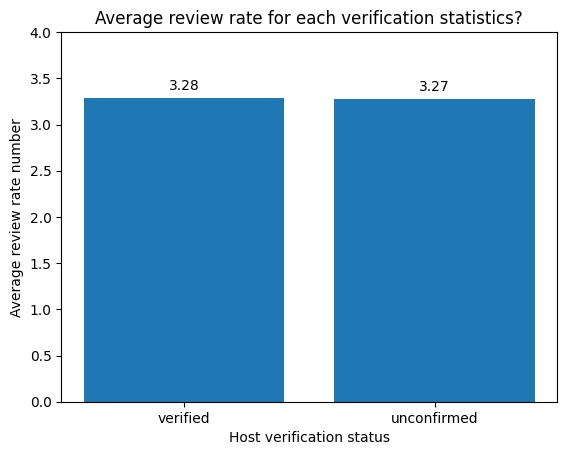

In [21]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4])
plt.xlabel('Host verification status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verification statistics?');
#

There is almost no relationship between host verification and Positive reviews.
 The reviews for both verified and unconfirmed are approximately equal i.e., 3.28 and 3.27 respectively.


Text(0.5, 1.0, 'Average review rate for each verification statistics?')

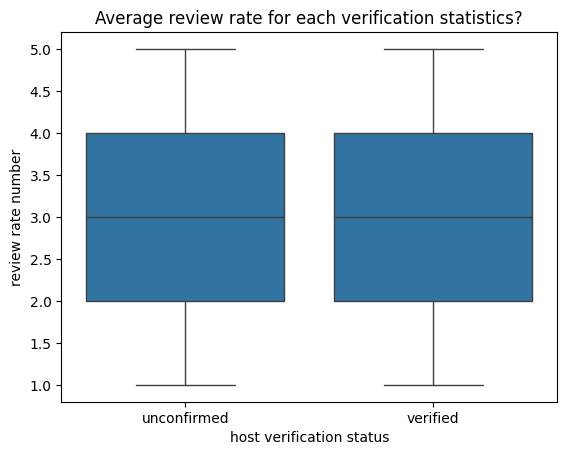

In [22]:
base_color = sns.color_palette()[0]
sns.boxplot(data, x = "host_identity_verified", y = 'review rate number', color = base_color)
plt.xlabel("host verification status")
plt.ylabel("review rate number")
plt.title("Average review rate for each verification statistics?")

## correlation between the price of a listing and its service fee

In [23]:
# Is there a correlation between the price of a listing and its service fee?
data['price_$'].corr(data['service fee_$'])

np.float64(0.9999909074778258)

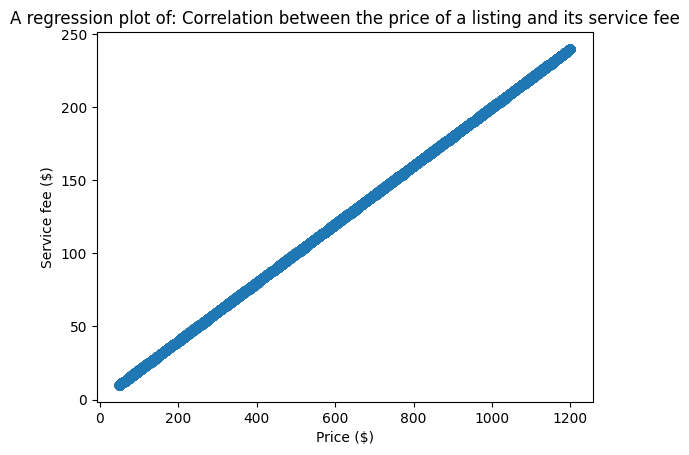

In [24]:
sns.regplot(data, x = 'price_$', y = 'service fee_$')
plt.title('A regression plot of: Correlation between the price of a listing and its service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service fee ($)');

The calculated Pearson correlation coefficient is approximately 0.99999, which is very close to 1. This indicates an **extremely strong positive linear correlation** between the price of a listing and its service fee. This means that as the price of a listing increases, the service fee also increases almost perfectly proportionally.

## Average review rate number vs neighborhood group and room type

In [25]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = data.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

Text(0.5, 1.0, 'Average review rate for each room/property type in neighbourhood group')

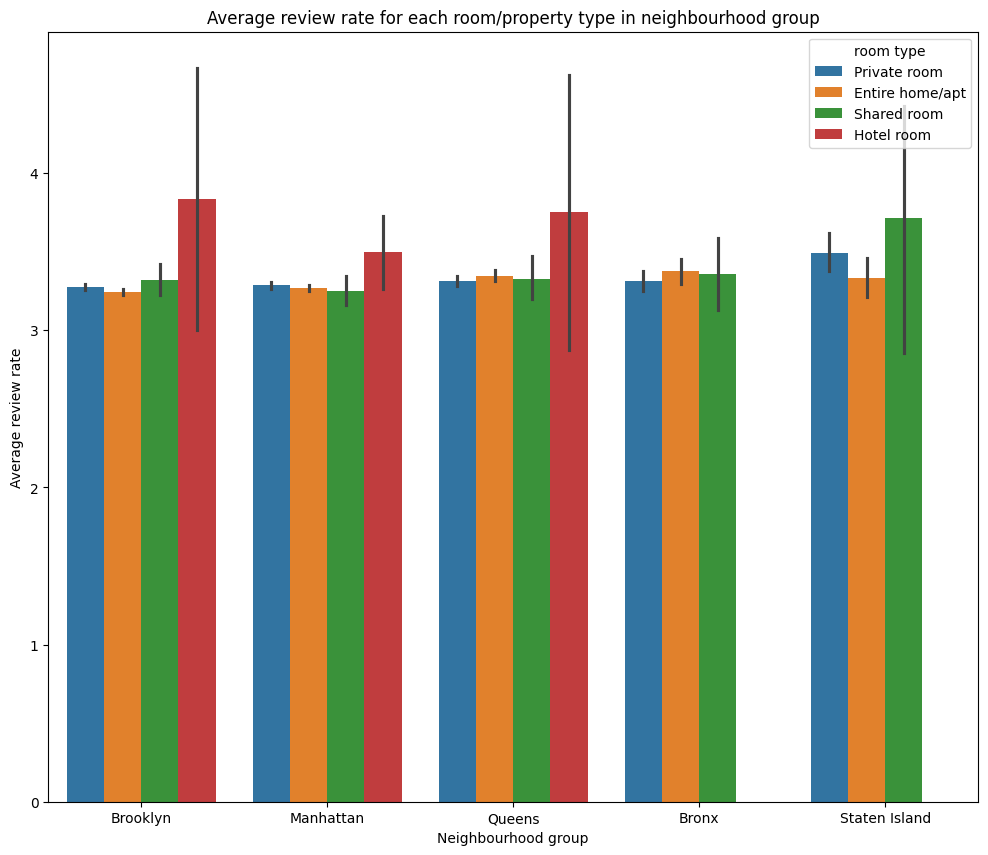

In [26]:
plt.figure(figsize = (12, 10))
sns.barplot(data, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood group')
plt.ylabel('Average review rate')
plt.title('Average review rate for each room/property type in neighbourhood group')

The review rate of hotel room is greater than that of the other room types in each neighbourhood group.

### Relation between higher availability and high host listings

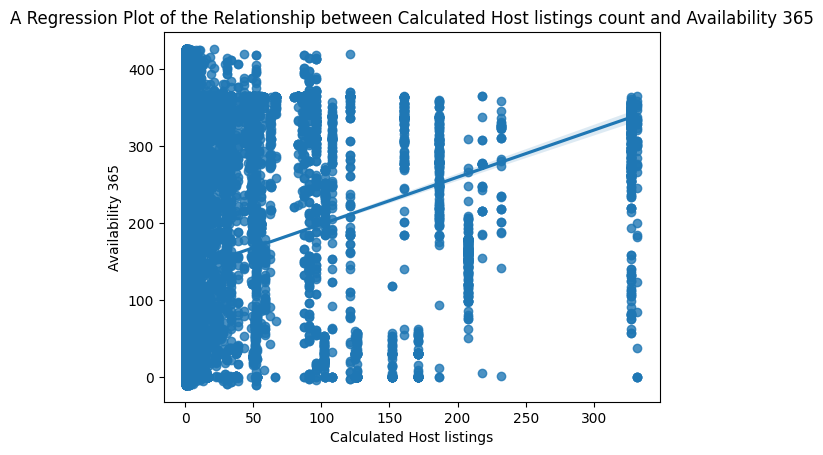

In [27]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings count and Availability 365');

In [28]:
data['calculated host listings count'].corr(data['availability 365'])

np.float64(0.13532575707935524)

The Pearson correlation coefficient shows a value of approximately 0.135. This indicates a weak positive linear correlation between the calculated host listings count and availability 365. In simpler terms, there's a very slight tendency for listings by hosts with more properties to have higher availability throughout the year, but the relationship is not strong.

#  Map of Airbnb Listings

Map of Airbnb Listings


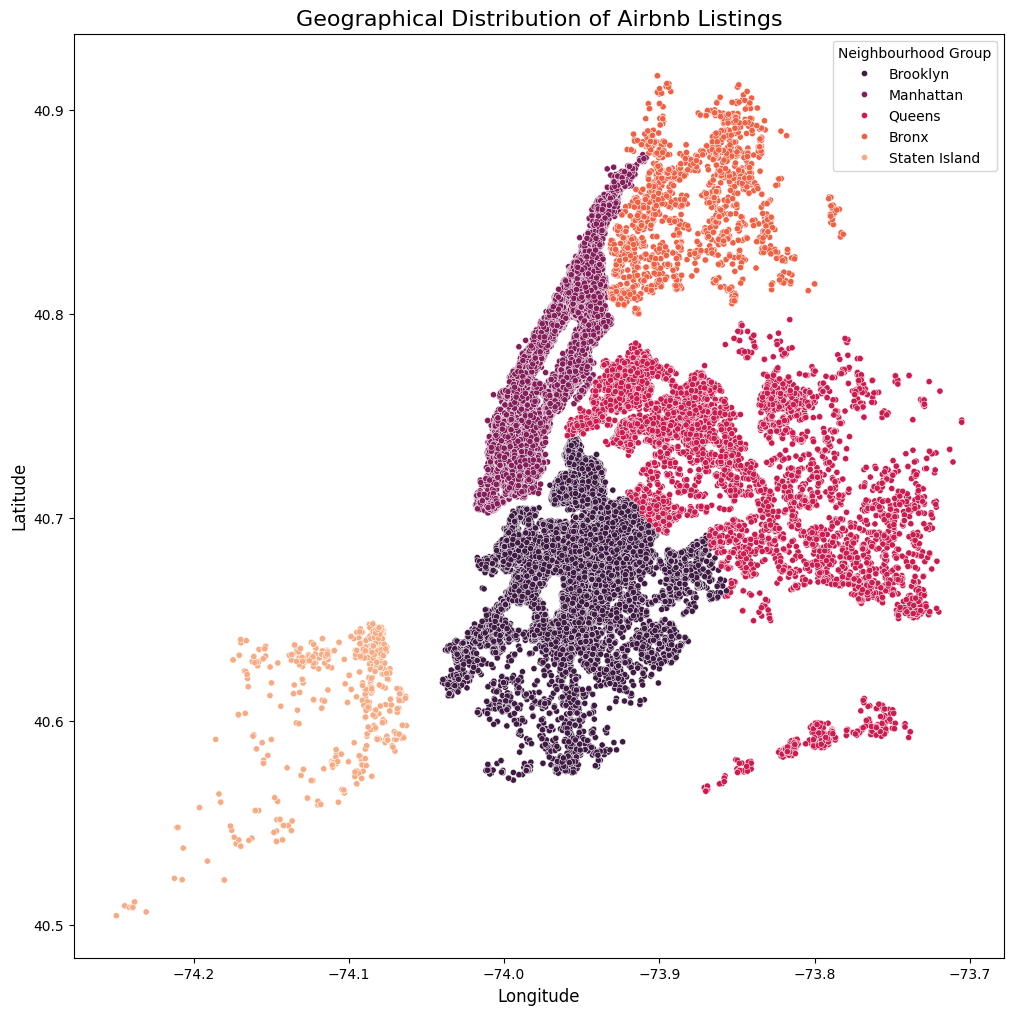

In [29]:
# This scatter plot uses latitude and longitude to approximate a map of the listings.
plt.figure(figsize=(12, 12))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group', s=20, data=data, palette='rocket')
plt.title('Geographical Distribution of Airbnb Listings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Neighbourhood Group')
print("Map of Airbnb Listings")
plt.show()

# Conclusion

After observing all the visualizations of analysis done on the AirBnB dataset the conclusions are:
1. The vast majority of Airbnb listings are concentrated in Brooklyn and Manhattan. (34794, 34741)
2. A strong preference for private accommodations among travelers, there is no dormitories, paying guest, etc.
3. Inverse relationship between a property's construction year and its price. It can be due to  historical value, prime locations, or larger unit sizes.
4.  The scatterplot shows the approximate geographical distributions of the listings.

# Future Scope

This code can be further extended to include Machine Learning algorithms for predictive modeling and also add NLP (Natural Language Processing) techniques for sentiment analysis on guest reviews for customization and targeted marketing.